name :  Raymond Mc Creesh

Id : 15211428

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [4]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

#### Plot the sum of squared distances from the data points to the centers of the k-means clusters for various values of k.

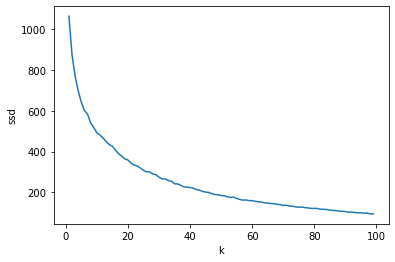

In [16]:
ssd = {}
for k in range(1,100):
   ssd[k]  = (cluster.KMeans(n_clusters=k, n_init=10, max_iter=1000).fit(data)).inertia_

plt.figure()
plt.plot(list(ssd.keys()), list(ssd.values()))
plt.xlabel("k")
plt.ylabel("ssd")
plt.show()

In [20]:
 for k in range(2, 100):
    kmeans = cluster.KMeans(n_clusters=k).fit(data)
    label = kmeans.labels_
    sil = silhouette_score(data, label, metric='euclidean')
    print("for k ={}, Silhouette coefficient = {}".format(k, sil))

for k =2, Silhouette coefficient = 0.18654028464861305
for k =3, Silhouette coefficient = 0.1915495261821749
for k =4, Silhouette coefficient = 0.1875700774802174
for k =5, Silhouette coefficient = 0.18497307390130688
for k =6, Silhouette coefficient = 0.20015749360372795
for k =7, Silhouette coefficient = 0.20353342561001392
for k =8, Silhouette coefficient = 0.22305969426084046
for k =9, Silhouette coefficient = 0.22819394467605392
for k =10, Silhouette coefficient = 0.2273343415413622
for k =11, Silhouette coefficient = 0.24591884896709645
for k =12, Silhouette coefficient = 0.23631740371390136
for k =13, Silhouette coefficient = 0.250289410761631
for k =14, Silhouette coefficient = 0.26058135340439553
for k =15, Silhouette coefficient = 0.2548961126362238
for k =16, Silhouette coefficient = 0.24966858358567495
for k =17, Silhouette coefficient = 0.268000863948142
for k =18, Silhouette coefficient = 0.27308617686192244
for k =19, Silhouette coefficient = 0.2813664456669321
for k =20

In [6]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [7]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


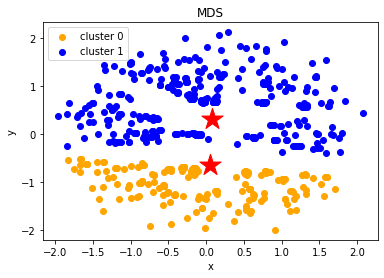

In [8]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [9]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [10]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  cluster  
0                    1              1     0.841086        1  
1                    0              0     0.871711        1  
2                    1              1     0.385189        1  
3                    1              1     0.717012        1  
4                    1              1     0.860305        1

In [11]:
df.tail()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
609    0.000000         0.666409    0.676143             0.750   
610    1.000000         0.858916    0.395858             0.375   
611    0.333333         1.313719    1.566110             0.750   
612    0.666667         1.267616    1.325676             0.750   
613    0.000000         0.925883    1.074155             0.750   

     Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
609               1            0           0            0            0   
610               1            1           0            1            0   
611               1            1           0            1            0   
612               1            1           0            1            0   
613               0            0           0            0            0   

     Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
609                  0                  0                       0   
610                  0                  0                       0   
611                  0                  0                       0   
612                  0                  0                       0   
613                  1                  0                       0   

     Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  TotalIncome  \
609                        0                    0              1     0.364708   
610                        0                    0              1     0.587496   
611                        0                    1              1     1.116075   
612                        0                    1              1     1.042256   
613                        1                    0              0     0.663523   

     cluster  
609        1  
610        1  
611        1  
612        1  
613        0

In [12]:
df.groupby('cluster').mean()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
cluster                                                              
0          0.248927         0.914184    1.078738          0.723498   
1          0.247594         0.918059    1.074684          0.707152   

         Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
cluster                                                                      
0              0.871245     0.738197    0.025751     0.648069     0.008584   
1              0.845144     0.832021    0.018373     0.648294     0.002625   

         Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
cluster                                                                 
0                 0.137339           0.042918                0.197425   
1                 0.131234           0.057743                0.230971   

         Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
cluster                                                                
0                            1.0             0.000000       0.768240   
1                            0.0             0.530184       0.637795   

         TotalIncome  
cluster               
0           0.851417  
1           0.869577